In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('../input/csgo-round-winner-classification/csgo_round_snapshots.csv')

In [3]:
data.head(5)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [4]:
data.isnull().any()

time_left                    False
ct_score                     False
t_score                      False
map                          False
bomb_planted                 False
                             ...  
ct_grenade_molotovgrenade    False
t_grenade_molotovgrenade     False
ct_grenade_decoygrenade      False
t_grenade_decoygrenade       False
round_winner                 False
Length: 97, dtype: bool

In [5]:
data.isnull().sum().sum()

0

In [6]:
# columns with non numeric entries
data.drop(data.select_dtypes(np.number) ,axis = 1)

,map,bomb_planted,round_winner
0,de_dust2,False,CT
1,de_dust2,False,CT
2,de_dust2,False,CT
3,de_dust2,False,CT
4,de_dust2,False,CT
...,...,...,...
122405,de_train,True,T
122406,de_train,False,T
122407,de_train,False,T
122408,de_train,False,T


In [7]:
data['bomb_planted'] = data['bomb_planted'].astype(np.int16)

In [8]:
data.drop(data.select_dtypes(np.number) ,axis = 1)

,map,round_winner
0,de_dust2,CT
1,de_dust2,CT
2,de_dust2,CT
3,de_dust2,CT
4,de_dust2,CT
...,...,...
122405,de_train,T
122406,de_train,T
122407,de_train,T
122408,de_train,T


In [9]:
encoder = LabelEncoder()

data['map'] = encoder.fit_transform(data['map'])
map_mapping = {index : label for index , label in enumerate(encoder.classes_)}

In [10]:
map_mapping

{0: 'de_cache',
 1: 'de_dust2',
 2: 'de_inferno',
 3: 'de_mirage',
 4: 'de_nuke',
 5: 'de_overpass',
 6: 'de_train',
 7: 'de_vertigo'}

In [11]:
data['round_winner'] = encoder.fit_transform(data['round_winner'])
round_mapping = {index : label for index , label in enumerate(encoder.classes_)}

In [12]:
round_mapping

{0: 'CT', 1: 'T'}

In [13]:
data.drop(data.select_dtypes(np.number) ,axis = 1)

""
0
1
2
3
4
...
122405
122406
122407
122408


In [14]:
# now everything in the dataset is in the form of numbers 
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [15]:
y = data['round_winner']
X = data.drop('round_winner',axis = 1)

In [16]:
y

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, Length: 122410, dtype: int64

In [17]:
X

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,1.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


In [18]:
# scaling our data
scaler = RobustScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.715105,-0.857143,-0.857143,-0.666667,0.0,0.000000,0.000000,-1.291096,-1.136054,-0.112782,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
1,0.545726,-0.857143,-0.857143,-0.666667,0.0,0.000000,0.000000,0.078767,-0.115646,-0.368421,...,-0.333333,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
2,0.010000,-0.857143,-0.857143,-0.666667,0.0,-0.726667,-0.561798,-0.284247,-0.455782,-0.357143,...,-0.333333,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
3,-0.168575,-0.857143,-0.857143,-0.666667,0.0,-0.726667,-0.561798,-0.284247,-0.455782,-0.357143,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
4,0.714837,-0.714286,-0.857143,-0.666667,0.0,0.000000,0.000000,-0.633562,-1.136054,0.966165,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,-0.709837,0.714286,1.142857,1.000000,1.0,-2.000000,-1.449438,-0.623288,0.085034,-0.406015,...,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.0,-0.5,0.0,0.0
122406,0.714480,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,-0.965753,-0.540816,0.451128,...,0.000000,0.333333,0.000000,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
122407,0.178754,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,0.404110,0.479592,-0.323308,...,1.000000,1.000000,0.666667,1.333333,0.5,0.0,0.0,2.0,0.0,0.0
122408,0.000179,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,0.404110,0.479592,-0.323308,...,0.000000,1.333333,-0.333333,0.666667,0.0,0.0,0.0,1.5,0.0,0.0


In [19]:
corr = pd.DataFrame(X).corr()
print(corr.shape)

(96, 96)


<AxesSubplot:>

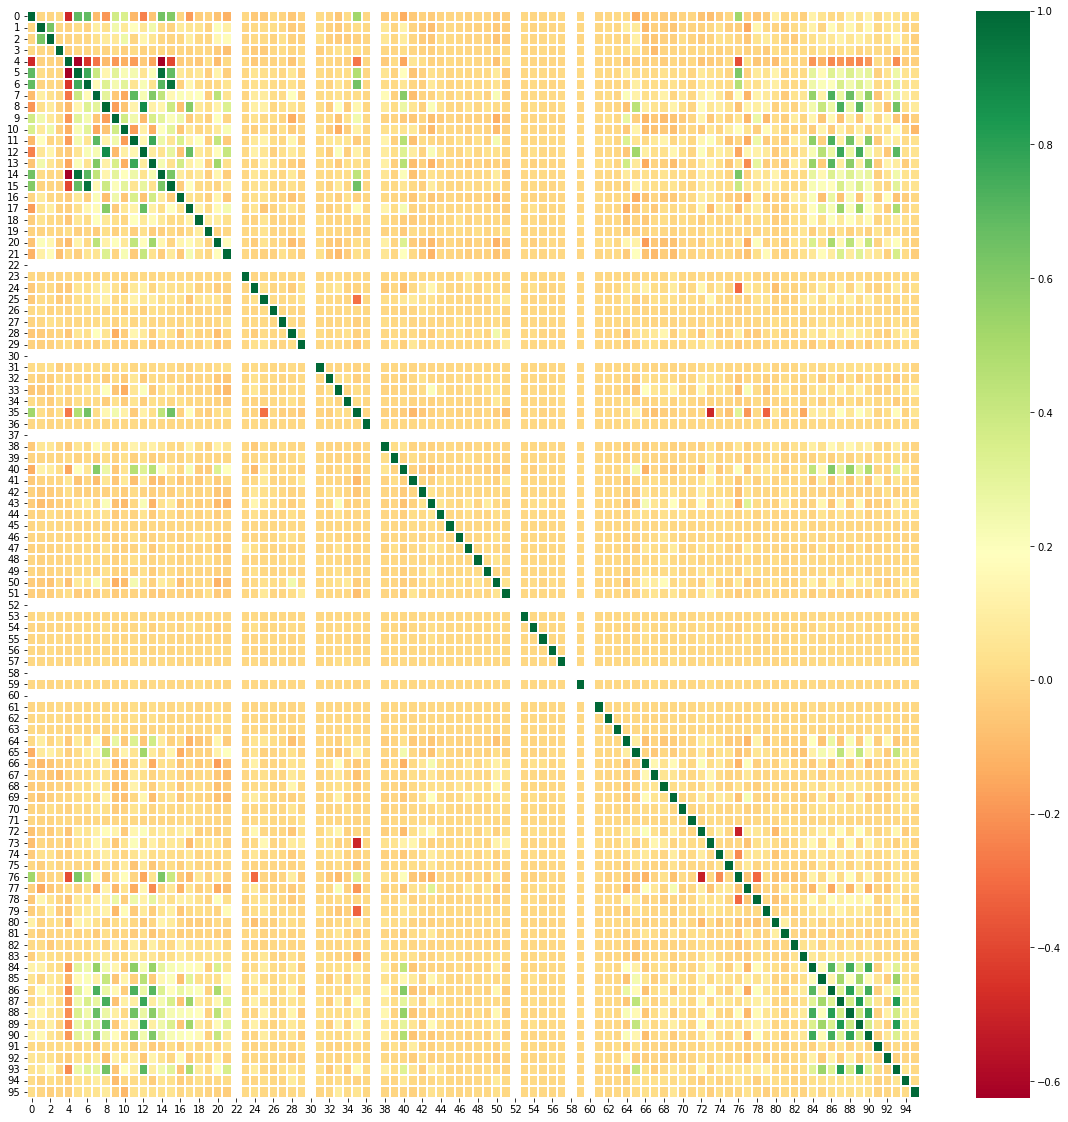

In [20]:
plt.figure(figsize = (20,20))
sns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30)

In [21]:
# reducing featuresusing PCA

pca = PCA(n_components = 84) # same as number of features, this would not reduce dimen.
pca.fit(X)

PCA(n_components=84)

In [22]:
#plotting pca components
pca.explained_variance_ratio_ # amount of variace as a percentage contained by each principle components

array([2.41692537e-01, 1.22452193e-01, 9.70485547e-02, 5.19765524e-02,
       4.44841077e-02, 4.02770527e-02, 3.60841630e-02, 3.52728682e-02,
       2.67764081e-02, 2.44497169e-02, 2.04646466e-02, 1.79740056e-02,
       1.55168485e-02, 1.47917126e-02, 1.42711979e-02, 1.30740553e-02,
       1.24574070e-02, 1.19376720e-02, 1.10480127e-02, 1.03287101e-02,
       9.88532422e-03, 9.03168607e-03, 8.52502240e-03, 8.47584699e-03,
       7.73008304e-03, 6.79341902e-03, 6.60439673e-03, 6.24323964e-03,
       5.93567991e-03, 5.73007129e-03, 5.35247264e-03, 4.00462889e-03,
       3.89698962e-03, 3.45429363e-03, 3.29063875e-03, 3.14738676e-03,
       2.89224630e-03, 2.73424911e-03, 2.67180608e-03, 2.54714631e-03,
       2.51231332e-03, 2.37105851e-03, 2.32240981e-03, 2.13782781e-03,
       1.92297678e-03, 1.73216950e-03, 1.66688624e-03, 1.31453371e-03,
       1.26461871e-03, 1.20488990e-03, 1.17620851e-03, 1.10075710e-03,
       1.01026643e-03, 9.12115938e-04, 7.87042171e-04, 5.53660030e-04,
      

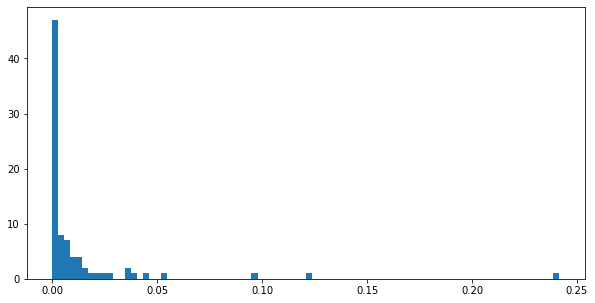

In [23]:
plt.figure(figsize = (10, 5))
plt.hist(pca.explained_variance_ratio_ , bins = 84)
plt.show()

In [24]:
def get_k_components(pca , alpha):
    # alpha --> thershold of avriance accepted to us
    total_variance = 0
    
    for features , variance in enumerate(pca.explained_variance_ratio_):
        total_variance += variance
        if (total_variance >= 1 - alpha):
            return features + 1
    
    return len(pca_explained_variance_ratio_)

In [25]:
get_k_components(pca , 0.1) 
# i.e. 25 components to get 90 percent of variance

25

In [26]:
get_k_components(pca , 0.05)
# i.e. 33 components to get 85 precent of variance

33

In [27]:
get_k_components(pca , 0.01)
# i.e. 51 components to get 99 percent variance

51

In [28]:
K = get_k_components(pca , 0.05)

In [29]:
X = pca.fit_transform(X)[: , 0:K]
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.807650,-3.041170,-0.477923,-0.788150,-0.837791,0.305314,-0.571604,-0.640431,0.391012,-0.089662,...,-0.406736,-0.220961,0.062492,-0.033852,-0.065296,0.007777,-0.080869,-0.049944,-0.165961,0.056775
1,0.403354,-2.516566,-0.271932,-1.210600,-0.940974,0.463845,-0.769151,-0.302018,-0.226065,-0.320548,...,-0.424848,0.001105,0.020463,0.051323,0.030929,-0.023390,0.045672,-0.006290,0.185634,0.072155
2,1.793312,-1.452247,-0.282613,-1.090443,-0.785376,0.333237,-0.704440,-0.376257,0.147196,-0.330615,...,0.156083,0.008170,-0.026589,0.010115,0.146338,-0.054307,0.084381,-0.020325,0.149910,0.107855
3,1.953921,-1.452769,-0.437852,-1.067899,-0.855280,0.367944,-0.569773,-0.317184,0.120949,-0.332918,...,0.102953,0.022223,0.006126,0.070663,0.069446,-0.048108,0.049091,-0.094075,0.219295,-0.199274
4,0.531003,-3.044842,-0.766788,-0.128865,-0.392524,0.306517,-0.459914,-0.600220,0.627068,-0.421338,...,-0.332748,-0.130514,-0.103789,0.085502,-0.007072,-0.034536,0.101459,-0.186271,0.057514,-0.024417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,2.662008,1.291910,1.542080,0.772222,-0.739458,-0.647647,0.687017,-0.644861,-1.184389,0.700592,...,0.002813,0.159939,0.097054,-0.472091,-0.097370,-0.511502,-0.017211,-0.110692,-0.203674,0.171138
122406,-0.110277,-2.209320,0.228796,1.364919,-0.437793,-0.861938,-0.019721,0.045146,-0.401692,0.860939,...,0.229384,0.662024,0.323117,-0.426443,-0.007367,-0.088607,0.094928,0.059359,-0.130469,0.205325
122407,-2.375611,0.942436,1.160162,-0.669273,1.450319,1.070238,0.582792,0.596464,-1.143166,1.541248,...,0.833349,0.424366,-0.131201,0.113948,-0.116364,-0.103917,0.191911,-0.500739,-0.255426,0.079432
122408,-1.905041,0.618990,1.723658,-0.066840,0.992627,1.524162,0.628238,0.485320,-1.258091,1.679712,...,0.700360,0.455182,-0.235973,0.224711,-0.127013,-0.221656,0.129971,-0.494348,-0.006301,-0.281792


In [30]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,train_size = 0.80)

In [31]:
lr = LogisticRegression(verbose = True)
nn = MLPClassifier(verbose = True)

In [32]:
lr.fit(X_train , y_train)
nn.fit(X_train , y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           34     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.78785D+04    |proj g|=  3.17060D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   34     26     28      1     0     0   1.370D+00   4.740D+04
  F =   47396.865441180744     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


Iteration 1, loss = 0.49070941
Iteration 2, loss = 0.45896403
Iteration 3, loss = 0.45324404
Iteration 4, loss = 0.44903286
Iteration 5, loss = 0.44603700
Iteration 6, loss = 0.44348449
Iteration 7, loss = 0.44124310
Iteration 8, loss = 0.43949237
Iteration 9, loss = 0.43778371
Iteration 10, loss = 0.43619599
Iteration 11, loss = 0.43481234
Iteration 12, loss = 0.43369346
Iteration 13, loss = 0.43236197
Iteration 14, loss = 0.43122904
Iteration 15, loss = 0.42995215
Iteration 16, loss = 0.42902825
Iteration 17, loss = 0.42766873
Iteration 18, loss = 0.42671223
Iteration 19, loss = 0.42590067
Iteration 20, loss = 0.42479380
Iteration 21, loss = 0.42366079
Iteration 22, loss = 0.42267409
Iteration 23, loss = 0.42195577
Iteration 24, loss = 0.42073678
Iteration 25, loss = 0.41979145
Iteration 26, loss = 0.41878167
Iteration 27, loss = 0.41834664
Iteration 28, loss = 0.41734785
Iteration 29, loss = 0.41655669
Iteration 30, loss = 0.41551511
Iteration 31, loss = 0.41509083
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(verbose=True)

In [33]:
print(f'Logistic Regression : { lr.score(X_test , y_test)} ' )
print(f'Neural Network : { nn.score(X_test , y_test)} ')

Logistic Regression : 0.7449146311575852 
Neural Network : 0.7799607875173596 
